<a href="https://colab.research.google.com/github/plaban1981/Supervised-Learning/blob/master/Decision_Tree_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n11021175,Male,42,121315,0\r\n17782313,Male,53,67214,0\r\n14603818,Female,59,111005,0\r\n18188198,Female,39,53414,0\r\n19357305,Male,39,114285,0\r\n19524602,Male,39,107458,0\r\n19455396,Female,20,85582,0\r\n16879913,Female,59,148335,1\r\n11838352,Male,48,80579,0\r\n13118940,Female,42,114204,0\r\n19524480,Female,32,87786,0\r\n12784093,Female,49,113544,0\r\n12895966,Male,55,88300,0\r\n14674114,Male,54,147066,0\r\n12393248,Male,57,139622,0\r\n18842131,Male,41,134716,0\r\n11060500,Male,51,116333,1\r\n14887406,Male,55,72567,1\r\n12606442,Male,44,123254,1\r\n17919323,Female,47,113548,1\r\n17207101,Male,52,79343,1\r\n17159912,Female,20,106149,1\r\n10718832,Male,40,59674,1\r\n16952550,Female,52,76333,1\r\n10494682,Male,28,118742,1\r\n16824758,Male,22,105897,1\r\n11168323,Male,25,114815,1\r\n16945283,Female,38,85428,1\r\n13865670,Male,57,114005,0\r\n16924204,Male,57,133402,0\r\n10877441,Male,43,106726,0\r\n16751398,Fema

## Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0


## Select the predictors and target

In [0]:
X = df.drop(['User ID','Purchased'],axis=1)
Y = df['Purchased']

In [6]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,42,121315
1,Male,53,67214
2,Female,59,111005
3,Female,39,53414
4,Male,39,114285


## Label  Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['Gender_'] = lb.fit_transform(X['Gender'])
X.head()

,Gender,Age,EstimatedSalary,Gender_
0,Male,42,121315,1
1,Male,53,67214,1
2,Female,59,111005,0
3,Female,39,53414,0
4,Male,39,114285,1


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
X = X[['Gender_','Age','EstimatedSalary']]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.8,random_state=1)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



## Decision Tree Model

In [0]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion='entropy',random_state=1)

## Fit the training data

In [10]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Predictions

In [0]:
y_pred = classifier.predict(X_test)

## Confusion Matrix

In [13]:
!pip install scikit-plot

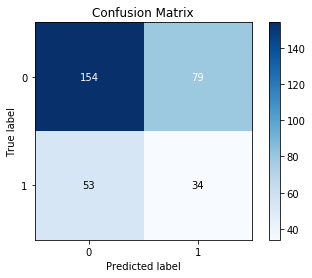

In [14]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_pred,y_test)

## Acuuracy Score

In [23]:
from sklearn.metrics import accuracy_score
ac = f"Accuracy score the model {accuracy_score(y_pred,y_test)}"
print(ac)

Accuracy score the model 0.5875
